### Table of Contents

* [Project Organization](#organization)
    * [If you're using jupyter notebooks:](#jupyter)
        * [1) First download the Genotypes file](#jupyterstep1)
        * [2) Run the Data_Cleaning_Pipeline.ipynb script](#jupyterstep2)
        * [3) Then run a classifier model script e.g. GWAS_LogisticRegression.ipynb](#jupyterstep3)
        * [4) Run through all the other classifiers one-by-one](#jupyterstep4)
    * [If you're using command line:](#commandline)
        * [1) First download the Genotypes file](#commandlinestep1)
        * [2) Run the Data_Cleaning_Pipeline.py script](#commandlinestep2)
            * [Option 1](#commandlineoption1)
                * [3) Then run a classifier model script e.g. GWAS_LogisticRegression.py](#commandlinestep3)
                * [4) Run through all the other classifiers one-by-one](#commandlinestep4)
            * [Option 2](#commandlineoption2)
                
* [Project Information](#info)

* [FAQ](#faq)
    * [Bio Basics](#biobasics)
    * [ML Basics](#mlbasics)
    * [Other Questions](#otherq)

* [References](#references)

<h1><a id = "organization">Project Organization</a></h1>

The project files are organized according to the following directory structure

```
GWAS_Capstone_Project_Samit_Watve
│    README.md
│    README.ipynb
│    Capstone_Project_Report_Samit_Watve.pdf
│    Capstone_Project_Report_Samit_Watve.docx
│    Data_Cleaning_Pipeline.ipynb #Jupyter notebook of the data cleaning pipeline
│    Data_Cleaning_Pipeline.py    #python script of the data cleaning pipeline
│    GWAS_analysis_OHE.csv        <--- This file is generated after running the cleaning pipeline 
│    .py files           #Format:: GWAS_name_of_classifier.ipynb (There are 8 such files, one for each classifier)             
│    .ipynb files        #Format:: GWAS_name_of_classifier.py (There are 8 such files, one for each classifier) 
└───data
│   │   
│   │   Combined_2645_Samples_Pedigree.csv    #This is the Patients file
│   
└───model outputs     #This folder contains 4 files each for 8 different models (i.e. 4 x 8 = 32 files)
    │   GradientBoostingClassifier_classification_report.txt   #Format:: name_of_classifier_classification_report.txt
    │   GradientBoostingClassifier_confusion_matrix.pdf        #Format:: name_of_classifier_confusion_matrix.pdf 
    │   GradientBoostingClassifier_grid_search_results.txt     #Format:: name_of_classifier_grid_search_results.txt
    │   GradientBoostingClassifier_ROC_AUC_curve.pdf           #Format:: name_of_classifier_ROC_AUC_curve.pdf
    │   ...
    │   ... #28 other files following the same pattern for each binary classifier that you run

```

<h2><a id = "jupyter">If you're using jupyter notebooks:</a></h2>

<h3><a id = "jupyterstep1">1) First download the Genotypes file</a></h3>
The file is too large to include in this package. 

Download the file from: https://dataverse.unc.edu/file.xhtml?fileId=7183963&version=1.0

When downloading, it will be called something like: `Combined_2645_Samples_Genotypes.anon.csv.gz`.

Unzip this file and save the `Combined_2645_Samples_Genotypes.csv` file in the `GWAS_Capstone_Project_Samit_Watve\data` folder

The updated directory will look like this:


```
GWAS_Capstone_Project_Samit_Watve

└───data
   │   Combined_2645_Samples_Genotypes.csv   <--- This file was newly added
   │   Combined_2645_Samples_Pedigree.csv    #This is the Patients file
   
```

<h3><a id = "jupyterstep2">2) Run the Data_Cleaning_Pipeline.ipynb script.</a></h3>

This script operates on both .csv files stored within the data folder.
After basic cleaning, EDA and data processing the script goes through the following filtering steps:


Filtering out columns where:

    Step 1) The amount of missing data i.e. "--" values are more than 5% of the data in the column

    Step 2) Only a single biallelic value is present (e.g. "CC" or "AG" in all patients)

    Step 3) Only 2 types of values, biallelic data and missing data (e.g. "GG" in 97% of patients and "--" in the remaining 3%) this situation is almost identical to situation 2) but the missing data in that column allows it to pass that particular filter.

    Step 4) Containing exclusively indel data i.e. II, ID, DI, DD or -- in the snp value fields

    Step 5) Minor Allele Frequency (MAF) < 0.02

    Step 6) Missing data i.e '-' is the second most common allele.

    **Each step from 1-6 successively reduces the number of features in the data set.**

    Step 7) Next we want calculate p-values and filter those snp's that only have strong associations with healthy or diseased individuals. This will be determined by performing chi-squared tests for each snp location and builiding a contingency table and applying a p-value cut-off (default is < 1e-7)

While all the other steps are mandatory, this step is unique since this is tunable. The default threshold is 1e-7, but we can increase or decrease this threshold to retain more or less features.
lower p-value cut-off = higher stringency = less features retained

    Step 8) As a last step, we want to drop all columns that contain one hot encoded values corresponding to "--", since they don't carry meaningful biological information
    
The final output of this script will be a single .csv fie called `GWAS_analysis_OHE.csv` which will be placed into the root folder i.e. GWAS_Capstone_Project. 

**Please note: This step is computationally intensive and may take several hours to run. In some cases you might have to adjust the page file size to avoid memory errors (I did so on my windows machine using the instructions given here, and that fixed my memory errors https://www.tomshardware.com/news/how-to-manage-virtual-memory-pagefile-windows-10,36929.html)**


<h3><a id = "jupyterstep3">3) Then run a classifier model script e.g. GWAS_LogisticRegression.ipynb</a></h3>

After performing some basic processing on the `GWAS_analysis_OHE.csv` file obtained from step 1, this script will iterate over several hyperparameters using a grid search with 5-fold cross validation and try to find the best LR model. This script will output 4 files:

a) `LogisticRegression_grid_search_results.txt` containing information about the best model parameters.

b) `LogisticRegression_classification_report.txt` containing information on model performance on the test set.

c) `LogisticRegression_confusion_matrix.pdf` containing a graphical output of the classification report in the form of a confusion matrix.

d) `LogisticRegression_ROC_AUC_curve.pdf` containing the Receiver operating characteristics (ROC) of the best model including the Area under the curve (AUC)

all of these files will be placed into the model outputs directory. 

<h3><a id = "jupyterstep4">4) Run through all the other classifiers one-by-one.</a></h3>

This will produce outputs similar to 2) for each classifier that you run. Since the process for all the classifiers is nearly identical, I have only annotated the `GWAS_LogisticRegression.ipynb` file. Please refer to this file to understand how the code works. All the other classifiers will work the same way. 

**Please note: Some classifiers may take much longer to run than others. This has to do with the complexity of each model as well as the number of hyperparameters being tuned.**

<h2><a id = "commandline">If you're using command line:</a></h2>

<h3><a id = "commandlinestep1">1) First download the Genotypes file</a></h3>
The file is too large to include in this package. 

Download the file from: https://dataverse.unc.edu/file.xhtml?fileId=7183963&version=1.0

When downloading, it will be called something like: `Combined_2645_Samples_Genotypes.anon.csv.gz`.

Unzip this file and save the `Combined_2645_Samples_Genotypes.csv` file in the `GWAS_Capstone_Project_Samit_Watve\data` folder

The updated directory will look like this:


```
GWAS_Capstone_Project_Samit_Watve

└───data
   │   Combined_2645_Samples_Genotypes.csv   <--- This file was newly added
   │   Combined_2645_Samples_Pedigree.csv    #This is the Patients file
   
```


<h3><a id = "commandlinestep2">2) Navigate to the `GWAS_Capstone_Project` directory and run the `Data_Cleaning_Pipeline.py` script by typing `python Data_Cleaning_Pipeline.py`</a></h3>

**Please note: This assumes that you have added python to your `$PATH` variable If it's not, figure out the steps needed to add python to path and then run this step**

This script operates on both .csv files stored within the data folder.
After basic cleaning, EDA and data processing the script goes through the following filtering steps:


Filtering out columns where:

    Step 1) The amount of missing data i.e. "--" values are more than 5% of the data in the column

    Step 2) Only a single biallelic value is present (e.g. "CC" or "AG" in all patients)

    Step 3) Only 2 types of values, biallelic data and missing data (e.g. "GG" in 97% of patients and "--" in the remaining 3%) this situation is almost identical to situation 2) but the missing data in that column allows it to pass that particular filter.

    Step 4) Containing exclusively indel data i.e. II, ID, DI, DD or -- in the snp value fields

    Step 5) Minor Allele Frequency (MAF) < 0.02

    Step 6) Missing data i.e '-' is the second most common allele.

    **Each step from 1-6 successively reduces the number of features in the data set.**

    Step 7) Next we want calculate p-values and filter those snp's that only have strong associations with healthy or diseased individuals. This will be determined by performing chi-squared tests for each snp location and builiding a contingency table and applying a p-value cut-off (default is < 1e-7)

    Step 8) As a last step, we want to drop all columns that contain one hot encoded values corresponding to "--", since they don't carry meaningful biological information
    
The final output of this script will be a single .csv fie called `GWAS_analysis_OHE.csv` which will be placed into the root folder i.e. GWAS_Capstone_Project. 

**Please note: This step is computationally intensive and may take several hours to run. In some cases you might have to adjust the page file size to avoid memory errors (I did so on my windows machine using the instructions given here, and that fixed my memory errors https://www.tomshardware.com/news/how-to-manage-virtual-memory-pagefile-windows-10,36929.html)**

<h3><a id = "commandlineoption1">Option 1</a></h3>

<h3><a id = "commandlinestep3">3) Then run a classifier model script e.g. Logistic regression by typing `python GWAS_LogisticRegression.py`</a></h3>

After performing some basic processing on the `GWAS_analysis_OHE.csv` file. This script will iterate over several hyperparameters using a grid search with 5-fold cross validation and try to find the best LR model. This script will output 4 files:

a) `LogisticRegression_grid_search_results.txt` containing information about the best model parameters.

b) `LogisticRegression_classification_report.txt` containing information on model performance on the test set.

c) `LogisticRegression_confusion_matrix.pdf` containing a graphical output of the classification report in the form of a confusion matrix.

d) `LogisticRegression_ROC_AUC_curve.pdf` containing the Receiver operating characteristics (ROC) of the best model including the Area under the curve (AUC)

all of these files will be placed into the model outputs directory. 

<h3><a id = "commandlinestep4">4) Run through all the other classifiers one-by-one.</a></h3>

This will produce outputs similar to 2) for each classifier that you run. Since the process for all the classifiers is nearly identical. I have only annotated the `GWAS_LogisticRegression.py` file. Please refer to this file to understand how the code works. All the other classifiers will work the same way. 

**Please note: Some classifiers may take much longer to run than others. This has to do with the complexity of each model as well as the number of hyperparameters being tuned.**

<h3><a id = "commandlineoption2">Option 2</a></h3>

You can combine steps 2 and 3 above by simply running the following bash command `for filename in GWAS_*.py; do python $filename; done`. This will run through all the classifiers automatically.

<h1><a id = "info">Project Information</a></h1>

**Q) Who created this project and why?**

A) This project was developed by [Samit Watve](#https://www.linkedin.com/in/samitwatve/) as a capstone project for [BrainStation](https://brainstation.io/)'s Data Science Bootcamp which was conducted virtually from September 28th - December 18th 2020.


**Q) What is this project about?**

A) The goal of this project was to create a machine learning model / pipeline, that is capable of predicting whether a test subject has Inflammatory Bowel Disease (IBD) or will develop IBD in the future **solely** using genomic data (i.e. SNP data).

**Q) How was the data collected for this project?**

A) All of the data required for this project was obtained from a scientific study titled "Dissecting Allele Architecture of Early Onset IBD Using High-Density Genotyping" published in the journal PloS One in 2015.

https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0128074

Article Source: Dissecting Allele Architecture of Early Onset IBD Using High-Density Genotyping Cutler DJ, Zwick ME, Okou DT, Prahalad S, Walters T, et al. (2015) Dissecting Allele Architecture of Early Onset IBD Using High-Density Genotyping. PLOS ONE 10(6): e0128074. https://doi.org/10.1371/journal.pone.0128074


The data files are hosted at 
https://dataverse.unc.edu/dataset.xhtml?persistentId=doi:10.15139/S3/11991


Cutler, David J.; Zwick, Michael E.; Okou, David T.; Prahalad, Sampath, 2015, "Dissecting allele architecture of early onset IBD using high-density genotyping", https://doi.org/10.15139/S3/11991, UNC Dataverse, V1

Specifically the two files we need are:

1) The Genotypes file: "Combined_2645_Samples_Genotypes.anon.csv.gz"

https://dataverse.unc.edu/file.xhtml?fileId=7183963&version=1.0

and 

2) The Patients file: "Combined_2645_Samples_Pedigree.anon.csv.gz"

https://dataverse.unc.edu/file.xhtml?fileId=7183964&version=1.0

These two data files were downloaded and unzipped into a `data` directory to get the underlying .csv files. All further steps of the analysis are performed directly on these .csv files through the `Data_Cleaning_Pipeline.ipynb` / `Data_Cleaning_Pipeline.py` script.

As of this writing, both the original study and the data files associated with the study were freely available as open source files.

**Q) How does it work?**

A) The project is sub-divided into two parts. 

**Part 1) Data Processing.** In the first part, I use an 8-step cleaning and filtering procedure to convert input data present in the the Genotypes file and the Patients file into a single .csv output file containing vastly reduced SNP features. The output file contains information in a one-hot encoded matrix format which is ideally suited for downstream machine learning and classification tasks.

**Part 2) Model optimization and model fitting.** In the second part I prototype, tune and score various binary classification models such as logistic regression (classifier), multi-layer perceptron classifier, ridge classifier, K-nearest neighbor classifier etc. 

For details on how to use the different files in this project refer to the [Project organization](#organization) section. 
Additional details regarding each of the data processing, model optimization and model tuning steps can be found in the Jupyter notebooks / .py files themselves.

**Q) What are the prerequisites for this project?**

A) **Background Knowledge Prerequisites**

This project is a bit technical in nature and uses advanced concepts in **inflammatory bowel disease** biology, **genetics** and **machine learning**. If you are already familiar with these topics, you can skip ahead to the [Key Findings](#findings) section.


Even if you are not familiar with these topics, I believe anybody with some familiarity with basic python programming and high school level biology / genetics knowledge, should be able to grasp a high-level overview of the main ideas and concepts in  the project by playing with the provided code and reviewing the sections on [Bio basics](#biobasics) and [ML basics](#mlbasics). You can also reach out to me on [LinkedIn](#https://www.linkedin.com/in/samitwatve/) to help clarify missing details.

**Software Prerequisites**

To replicate this analysis yourself you will need `python 3.7 or higher` installed on your computer. For ease of use `Jupyter notebook / Jupyter lab` environments are recommended. However you can also run the python scripts directly from the command line by typing `python filename.py`

All code was written in `Python v3.7.8` using a `Jupyter lab (2.2.9)` environment. Data cleaning, pre-processing and visualization was performed using data science packages such as `pandas (1.1.4)`, `numpy (1.19.4)`, `matplotlib (3.3.3)` and `seaborn (0.11.0)`, and machine learning was performed using `sci-kitlearn (0.23.2)` and `xgboost(1.3.0.post0)`. SNP filtering was performed using a custom data cleaning script that performed over 100,000 chi-squared tests using the `scipy.stats (1.4.1)` module. For tracking script progress also use `tqdm 4.52.0`

The code used in this project was prototyped entirely in Jupyter notebooks on a 16 GB (RAM) machine running Windows 10. Therefore, the code provided will likely work best on another machine with similar specifications. However, the code should run fairly smoothly on Mac on Linux operating systems assuming you have all the packages installed correctly and data folders organized correctly, also see [Project organization](#organization).

<h1><a id = "faq">FAQ</a></h1>

<h2><a id = "biobasics">Bio Basics</a></h2>

**Q) What is IBD?**

A) Inflammatory Bowel Disease (IBD) is an autoimmune condition of the colon and small intestine. Crohn's disease and ulcerative colitis are the principal types of inflammatory bowel disease. Crohn's disease affects the small intestine and large intestine, as well as the mouth, esophagus, stomach and the anus, whereas ulcerative colitis primarily affects the colon and the rectum. IBD is a complex disease which arises as a result of the interaction of environmental and genetic factors leading to immunological responses and inflammation in the intestine. (source : Wikipedia) https://en.wikipedia.org/wiki/Inflammatory_bowel_disease

**Q) Why are you looking at genetic features?**

A) A genetic component to IBD has been recognized for over a century.[1] Research that has contributed to understanding of the genetics include studies of ethnic groups (e.g., Ashkenazi Jews), familial clustering, epidemiological studies, and twin studies. With the advent of molecular genetics, understanding of the genetic basis has expanded considerably, particularly in the past decade.[2] The first gene linked to IBD was NOD2 in 2001. Genome-wide association studies have since added to understanding of the genomics and pathogenesis of the disease. More than 200 single nucleotide polymorphisms (SNPs or "snips") are now known to be associated with susceptibility to IBD.[3] One of the largest genetic studies of IBD was published in 2012 .[4] The analysis explained more of the variance in Crohn's disease and ulcerative colitis than previously reported.[2] (source : Wikipedia) https://en.wikipedia.org/wiki/Inflammatory_bowel_disease


Another reason to look at genetic features is that the genome is essentially fixed at conception i.e. the genome sequence doesn't change over a person's lifetime (ignoring telomeres and spontaneous mutations that occur over a persons lifetime).

**Q) What are SNPs?**

A) SNPs are single nucleotide polymorphisms (or variants). For example, let's say we are looking at the gene sequence for gene X from the reference genome (such as the human reference genome, GRCh38, from the Genome Reference Consortium which is derived from thirteen anonymous volunteers).

let's assume the sequence of gene X in the reference genome looks like:

...AAGTGCT`G`TGATGAGCTCGA...

Now let's say we obtain the same gene X sequence from my genome, and it looks like:

...AAGTGCT`A`TGATGAGCTCGA...

We see that in my genome `A` has replaced `G` in the highlighted spot. This is a SNP. A single nucleotide position where my genome sequence is different from the standard reference. A typical genome differs from the reference human genome at approximately 4 to 5 million sites, most of which (more than 99.9%) consist of SNPs and short indels.

**Q) What are indels?**

A) Indels refers to insertions / deletions

Assume that a normal gene sequence looks like this:

'... AGGGTGTCGTAGATTCGTCGGATAGTG ...'

Sometimes this sequence might get mutated to:

'... AGGGTGTCGT`GTA`AGATTCGTCGGATAGTG ...'

here we have a 3 base `insertion`, where 3 extra bases `GTA` were added to the original sequence 

Alternatively, the original sequence might be mutated to 

'... AGGGT`^`GTAGATTCGTCGGATAGTG ...'

here, we have a 3 base `deletion` where the sequence `GTC` was deleted from the location indicated by `^`

**Q) How is all this sequence data generated from DNA samples?**

A) There are several methods. For a small number of samples (10s to 100s) high throughput DNA sequencing is a good option. (https://en.wikipedia.org/wiki/DNA_sequencing#:~:text=DNA%20sequencing%20is%20the%20process,guanine%2C%20cytosine%2C%20and%20thymine.)

However for population studies that have higher number of samples (typically in the ~1000s) this can become expensive. High throughput sequencing also generates too much data for some applications. In these cases SNP typing is usually prefered (https://en.wikipedia.org/wiki/SNP_genotyping) which looks at a smaller number of pre-determined genome positions. A high density SNP microarray is a popular method (https://en.wikipedia.org/wiki/SNP_array). 

In the original paper,"Dissecting Allele Architecture of Early Onset IBD Using High-Density Genotyping" the authors used a custom high density SNP microarray to collect DNA sequences of more than 2600 patients. The Immunochip, a custom Illumina Infinium High-Density array, contains 196,524 polymorphisms (718 small insertion/deletions, 195,806 SNPs). It was initiated by the Welcome Trust Case-Control Consortium and designed for deep replication of established autoimmune and inflammatory disease loci identified by GWAS of common variants using data from the 1000 Genomes Project and any other available disease-specific resequencing data. The Immunochip Consortium selected 186 distinct loci containing markers reaching genome-wide significance (P < 5 × 10−8) from 12 diseases (autoimmune thyroid disease, ankylosing spondylitis, Crohn's disease, celiac disease, IgA deficiency, multiple sclerosis, primary biliary cirrhosis, psoriasis, rheumatoid arthritis, systemic lupus erythematosus, type 1 diabetes, and ulcerative colitis). For each disease, ~3,000 SNPs were selected from available GWAS data for deep replication, as well as to cover strong candidate genes. 

<h2><a id = "mlbasics">ML Basics</a></h2>

**Q) What is machine learning and how does it work?**

A) Machine learning involves the use some advanced statistical techniques to perform tasks like classification (healthy vs diseased, cat vs dog,) or regression (predicting house prices, or who survived the titanic, or the height of a person given the weight etc). There are dozens of different algorithms such as KNN, logistic regression, SVM, multi-layer perceptron etc. Each works in a slightly different way, however most algorithms involve some form of *curve-fitting* i.e. generating an equation that describes the relationship between the input variables and the output variables. This is usually done in two phases. In the training phase, the algorithm "learns" to detect patterns from a subset of the data (the training set). Once a model has been trained, you can try to predict the output variables from a different subset of the data (the test set). By tallying up the correct / incorrect predictions generated by the model we can score the performance of each model using metrics like accuracy, precision, recall etc. https://en.wikipedia.org/wiki/Machine_learning

**Q) How do you calculate precision, recall and accuracy?**

A) For a classification task,

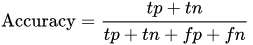

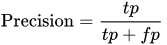

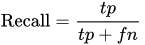

where tp = true positives, fp = false positives, tn = true negatives, fn = false negatives 


**Q) How can I use machine learning tools?**

A) For this project I used a python package called `sci-kitlearn` which natively supports several dozen machine learning algorithms with an API that's fairly straightforward to use. Othe packages such as `keras`, `tensorflow` and `pytorch` have been created for more complex models that involve neural networks. For this project I mainly used sci-kitlearn.


<h2><a id = "otherq">Other Questions</a></h2>

**Q) Why didn't you use a software such as PLINK for doing SNP feature selection or association testing?**

A) Mainly personal preference. However, I also wanted to develop my own pipeline fromm start to end in order to showcase my EDA and data-cleaning skills.

**Q) How is your pipeline different from other published studies?**

A) There are several differences.

1) Most published pipelines use PLINK for pre-selection of SNP's commonly associated with the phenotype of interest such as disease vs healthy
2) Other pipelines use genomic data from a different set of patients and also include different SNP features than the ones used in this project. So the model results will be different.

**Q) What are the major findings of your project?**

A) For a detailed report see the `Capstone_Project_Report_Samit_Watve.pdf` file. However, the key findings can be summarized as follows.

In this project I used several binary classification algorithms for predicting whether a given individual belongs to the healthy or the diseased (IBD) class using select SNP data as input features. Logistic regression and Multi-layered Perceptron models performed the best with accuracy scores ranging between ~0.81-0.84 across several trials and ROC-AUC values of ~0.9 or greater, which is higher than some previously published models. This project demonstrates the viability of machine learning approaches for disease risk classification and adds another tool to the clinician’s toolbox. Such methods will enable researchers to develop personalized interventions at an early age before disease symptoms appear.

<h1><a id = "references">References</a></h1>
[1] Ek WE, D'Amato M, Halfvarson J (2014). "The history of genetics in inflammatory bowel disease". Annals of Gastroenterology. 27 (4): 294–303. PMC 4188925. PMID 25331623.

[2] Liu TC, Stappenbeck TS (May 2016). "Genetics and Pathogenesis of Inflammatory Bowel Disease". Annual Review of Pathology. 11: 127–48. doi:10.1146/annurev-pathol-012615-044152. PMC 3204665. PMID 26907531.

[3] Ye BD, McGovern DP (October 2016). "Genetic variation in IBD: progress, clues to pathogenesis and possible clinical utility". Expert Review of Clinical Immunology. 12 (10): 1091–107. doi:10.1080/1744666X.2016.1184972. PMC 5083126. PMID 27156530.

[4] Jostins L, Ripke S, Weersma RK, Duerr RH, McGovern DP, Hui KY, et al. (November 2012). "Host-microbe interactions have shaped the genetic architecture of inflammatory bowel disease". Nature. 491 (7422): 119–24. Bibcode:2012Natur.491..119.. doi:10.1038/nature11582. PMC 3491803. PMID 23128233.